In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
import pickle
import networkx as nx
import math

In [2]:
apfmatrix2018 = pd.read_csv('APFmatrix2018.csv', low_memory=False)
apfmatrix2019 = pd.read_csv('APFmatrix2019.csv', low_memory=False)
apfmatrix2020 = pd.read_csv('APFmatrix2020.csv', low_memory=False)


In [3]:
file2018 = open('dfcompdict2018.pickle', 'rb')
dfcompdict2018 = pickle.load(file2018)
file2018.close()

In [4]:
entityids2018 = []
for key in dfcompdict2018:
    entityids2018.append(key)

In [5]:
file2019 = open('dfcompdict2019.pickle', 'rb')
dfcompdict2019 = pickle.load(file2019)
file2019.close()

file2020 = open('dfcompdict2020.pickle', 'rb')
dfcompdict2020 = pickle.load(file2020)
file2020.close()

In [6]:
entityids2019 = []
for key in dfcompdict2019:
    entityids2019.append(key)
    
entityids2020 = []
for key in dfcompdict2020:
    entityids2020.append(key)

In [7]:
apfmatrix2018.set_index('Unnamed: 0',inplace=True)

In [8]:
apfmatrix2018 = apfmatrix2018/len(entityids2018)

In [9]:
apfmatrix2019.set_index('Unnamed: 0',inplace=True)
apfmatrix2020.set_index('Unnamed: 0',inplace=True)
apfmatrix2019 = apfmatrix2019/len(entityids2019)
apfmatrix2020 = apfmatrix2020/len(entityids2020)

In [10]:
file2018 = open('eventlist2018.pickle', 'rb')
eventlist2018 = pickle.load(file2018)
file2018.close()

eventlist2018all = set()
for key in eventlist2018:
    eventlist2018all = set.union(eventlist2018all,set(eventlist2018[key]))

In [11]:
file2019 = open('eventlist2019.pickle', 'rb')
eventlist2019 = pickle.load(file2019)
file2019.close()

eventlist2019all = set()
for key in eventlist2019:
    eventlist2019all = set.union(eventlist2019all,set(eventlist2019[key]))

In [12]:
file2020 = open('eventlist2020.pickle', 'rb')
eventlist2020 = pickle.load(file2020)
file2020.close()

eventlist2020all = set()
for key in eventlist2020:
    eventlist2020all = set.union(eventlist2020all,set(eventlist2020[key]))

In [13]:
Ni2018 = {}
for eventi in eventlist2018all:
    eventisum = 0
    for eventj in eventlist2018all:
        if eventi != eventj:
            eventisum = eventisum + apfmatrix2018.at[eventi,eventj] + apfmatrix2018.at[eventj,eventi] - (apfmatrix2018.at[eventi,eventj]*apfmatrix2018.at[eventj,eventi])
    Ni2018[eventi] = 1 + eventisum


In [14]:
Ni2019 = {}
for eventi in eventlist2019all:
    eventisum = 0
    for eventj in eventlist2019all:
        if eventi != eventj:
            eventisum = eventisum + apfmatrix2019.at[eventi,eventj] + apfmatrix2019.at[eventj,eventi] - (apfmatrix2019.at[eventi,eventj]*apfmatrix2019.at[eventj,eventi])
    Ni2019[eventi] = 1 + eventisum


In [15]:
Ni2020 = {}
for eventi in eventlist2020all:
    eventisum = 0
    for eventj in eventlist2020all:
        if eventi != eventj:
            eventisum = eventisum + apfmatrix2020.at[eventi,eventj] + apfmatrix2020.at[eventj,eventi] - (apfmatrix2020.at[eventi,eventj]*apfmatrix2020.at[eventj,eventi])
    Ni2020[eventi] = 1 + eventisum



In [ ]:
with open('Ni2018.pickle', 'wb') as filehandle:
    pickle.dump(Ni2018, filehandle)
with open('Ni2019.pickle', 'wb') as filehandle:
    pickle.dump(Ni2019, filehandle)
with open('Ni2020.pickle', 'wb') as filehandle:
    pickle.dump(Ni2020, filehandle)

In [16]:
Ei2018term1 = {}
for eventi in eventlist2018all:
    eventisum = 0
    for eventj in eventlist2018all:
        if eventi != eventj:
            eventisum = eventisum + apfmatrix2018.at[eventi,eventj] + apfmatrix2018.at[eventj,eventi]
    Ei2018term1[eventi] = eventisum

In [17]:
Ei2018term2 = {}
for eventi in tqdm(eventlist2018all):
    eventisum = 0
    for eventk in eventlist2018all:
        if eventi != eventk:
            for eventj in eventlist2018all:
                Pik,Pij,Akj,Ajk = 0,0,0,0
                if eventj != eventi and eventj != eventk:
                    Pik = apfmatrix2018.at[eventi,eventk] + apfmatrix2018.at[eventk,eventi] - (apfmatrix2018.at[eventi,eventk]*apfmatrix2018.at[eventk,eventi])
                    Pij = apfmatrix2018.at[eventi,eventj] + apfmatrix2018.at[eventj,eventi] - (apfmatrix2018.at[eventi,eventj]*apfmatrix2018.at[eventj,eventi])
                    Akj = apfmatrix2018.at[eventk,eventj]
                    Ajk = apfmatrix2018.at[eventj,eventk]
                eventisum = eventisum + Pik*Pij*(Akj+Ajk)        
    Ei2018term2[eventi] = eventisum

100%|██████████| 214/214 [09:23<00:00,  2.63s/it]


In [22]:
with open('Ei2018term2.pickle', 'wb') as filehandle:
    pickle.dump(Ei2018term2, filehandle)

In [23]:
with open('Ei2018term1.pickle', 'wb') as filehandle:
    pickle.dump(Ei2018term1, filehandle)

In [18]:
Ei2018 = {}
for key in Ei2018term2:
    Ei2018[key] = Ei2018term1[key] + Ei2018term2[key]

In [19]:
with open('Ei2018.pickle', 'wb') as filehandle:
    pickle.dump(Ei2018, filehandle)

In [20]:
Ei2019term1 = {}
for eventi in eventlist2019all:
    eventisum = 0
    for eventj in eventlist2019all:
        if eventi != eventj:
            eventisum = eventisum + apfmatrix2019.at[eventi,eventj] + apfmatrix2019.at[eventj,eventi]
    Ei2019term1[eventi] = eventisum

In [28]:
with open('Ei2019term1.pickle', 'wb') as filehandle:
    pickle.dump(Ei2019term1, filehandle)

In [21]:
Ei2019term2 = {}
for eventi in tqdm(eventlist2019all):
    eventisum = 0
    for eventk in eventlist2019all:
        if eventi != eventk:
            for eventj in eventlist2019all:
                Pik,Pij,Akj,Ajk = 0,0,0,0
                if eventj != eventi and eventj != eventk:
                    Pik = apfmatrix2019.at[eventi,eventk] + apfmatrix2019.at[eventk,eventi] - (apfmatrix2019.at[eventi,eventk]*apfmatrix2019.at[eventk,eventi])
                    Pij = apfmatrix2019.at[eventi,eventj] + apfmatrix2019.at[eventj,eventi] - (apfmatrix2019.at[eventi,eventj]*apfmatrix2019.at[eventj,eventi])
                    Akj = apfmatrix2019.at[eventk,eventj]
                    Ajk = apfmatrix2019.at[eventj,eventk]
                eventisum = eventisum + Pik*Pij*(Akj+Ajk)        
    Ei2019term2[eventi] = eventisum

100%|██████████| 213/213 [09:13<00:00,  2.60s/it]


In [30]:
with open('Ei2019term2.pickle', 'wb') as filehandle:
    pickle.dump(Ei2019term2, filehandle)

In [22]:
Ei2019 = {}
for key in Ei2019term2:
    Ei2019[key] = Ei2019term1[key] + Ei2019term2[key]

In [23]:
with open('Ei2019.pickle', 'wb') as filehandle:
    pickle.dump(Ei2019, filehandle)

In [24]:
Ei2020term1 = {}
for eventi in eventlist2020all:
    eventisum = 0
    for eventj in eventlist2020all:
        if eventi != eventj:
            eventisum = eventisum + apfmatrix2020.at[eventi,eventj] + apfmatrix2020.at[eventj,eventi]
    Ei2020term1[eventi] = eventisum

In [32]:
with open('Ei2020term1.pickle', 'wb') as filehandle:
    pickle.dump(Ei2020term1, filehandle)

In [25]:
Ei2020term2 = {}
for eventi in tqdm(eventlist2020all):
    eventisum = 0
    for eventk in eventlist2020all:
        if eventi != eventk:
            for eventj in eventlist2020all:
                Pik,Pij,Akj,Ajk = 0,0,0,0
                if eventj != eventi and eventj != eventk:
                    Pik = apfmatrix2020.at[eventi,eventk] + apfmatrix2020.at[eventk,eventi] - (apfmatrix2020.at[eventi,eventk]*apfmatrix2020.at[eventk,eventi])
                    Pij = apfmatrix2020.at[eventi,eventj] + apfmatrix2020.at[eventj,eventi] - (apfmatrix2020.at[eventi,eventj]*apfmatrix2020.at[eventj,eventi])
                    Akj = apfmatrix2020.at[eventk,eventj]
                    Ajk = apfmatrix2020.at[eventj,eventk]
                eventisum = eventisum + Pik*Pij*(Akj+Ajk)        
    Ei2020term2[eventi] = eventisum

100%|██████████| 215/215 [09:34<00:00,  2.67s/it]


In [26]:
Ei2020 = {}
for key in Ei2020term2:
    Ei2020[key] = Ei2020term1[key] + Ei2020term2[key]

In [27]:
with open('Ei2020.pickle', 'wb') as filehandle:
    pickle.dump(Ei2020, filehandle)

In [28]:
# plotting
plottinglist2018 = []
for key in Ei2018:
    plottinglist2018.append([key, math.log(Ni2018[key]),math.log(Ei2018[key])])

In [29]:
# plotting
plottinglist2019 = []
for key in Ei2019:
    plottinglist2019.append([key, math.log(Ni2019[key]),math.log(Ei2019[key])])

In [30]:
# plotting
plottinglist2020 = []
for key in Ei2020:
    plottinglist2020.append([key, math.log(Ni2020[key]),math.log(Ei2020[key])])

In [73]:
plotlist2018 = np.array(plottinglist2018)
plotlist2019 = np.array(plottinglist2019)
plotlist2020 = np.array(plottinglist2020)

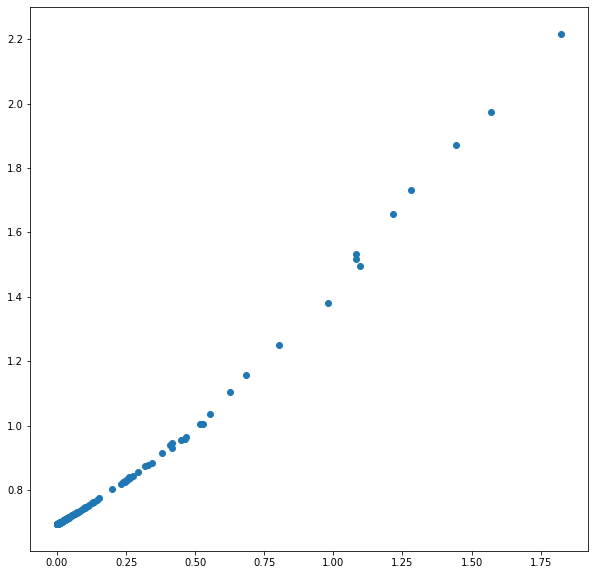

In [77]:
plt.figure(figsize=(10,10))
plt.scatter(plotlist2018[:,0],plotlist2018[:,1])
# plt.plot([1,2,3,5],[1,2,3,10])

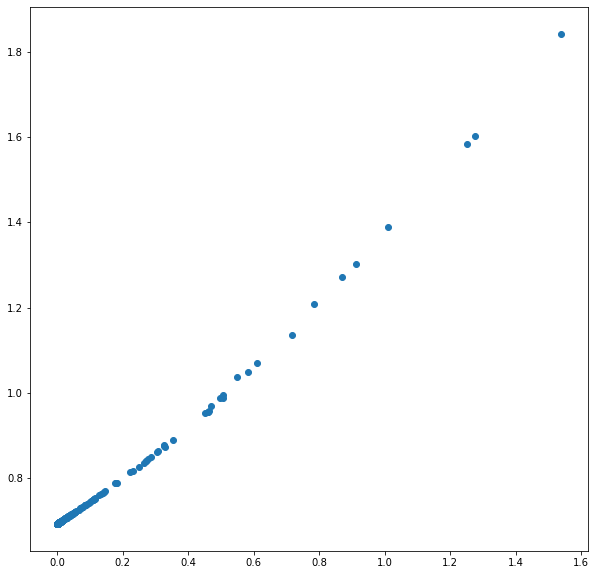

In [78]:
plt.figure(figsize=(10,10))
plt.scatter(plotlist2019[:,0],plotlist2019[:,1])

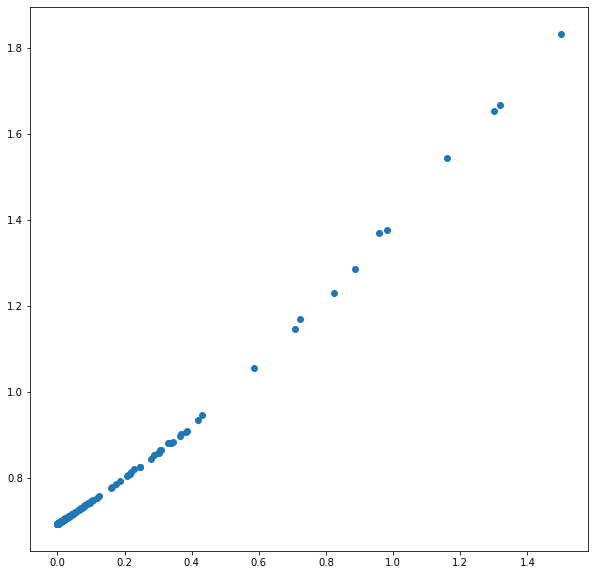

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(plotlist2020[:,0],plotlist2020[:,1])

In [99]:
df2018 = pd.DataFrame(plottinglist2018)
df2019 = pd.DataFrame(plottinglist2019)
df2020 = pd.DataFrame(plottinglist2020)

In [100]:
df2018.columns = ['key','nodes','edges']
df2019.columns = ['key','nodes','edges']
df2020.columns = ['key','nodes','edges']

In [101]:
df2018.set_index('key', inplace=True)
df2019.set_index('key', inplace=True)
df2020.set_index('key', inplace=True)

In [102]:
df2018.sort_values(by='nodes')
df2019.sort_values(by='nodes')
df2020.sort_values(by='nodes')

,nodes,edges
key,,
insider-trading-lawsuit,0.000047,0.693171
dam-accident,0.000094,0.693194
ebit-estimate,0.000094,0.693194
accelerated-approval-application,0.000094,0.693194
board-member-health,0.000094,0.693194
...,...,...
analyst-ratings-change,0.982291,1.375782
ownership,1.159072,1.543844
stock-price,1.301001,1.653743


In [103]:
df2018[df2018.nodes>0.7]

,nodes,edges
key,,
earnings-per-share-estimate,1.215786,1.658462
stake,1.081782,1.533936
ownership,1.279721,1.730084
stock-price,1.443257,1.870916
price-target,0.801632,1.249257
earnings-per-share,1.095316,1.494797
earnings,1.824783,2.217016
dividend,0.981316,1.380441
analyst-ratings-change,1.080001,1.516786


In [104]:
df2019[df2019.nodes>0.7]

,nodes,edges
key,,
earnings-per-share-estimate,0.784302,1.209094
ownership,1.011007,1.390125
stock-price,1.275142,1.601645
earnings-per-share,0.911877,1.302674
earnings,1.539203,1.840938
dividend,0.716300,1.135844
analyst-ratings-change,0.871114,1.270989
revenue,1.252635,1.584616


In [105]:
df2020[df2020.nodes>0.7]

,nodes,edges
key,,
earnings-per-share-estimate,0.957816,1.370068
stake,0.721965,1.168764
ownership,1.159072,1.543844
stock-price,1.301001,1.653743
price-target,0.708750,1.146152
earnings-per-share,0.885603,1.286197
earnings,1.500132,1.832076
dividend,0.825156,1.230585
analyst-ratings-change,0.982291,1.375782


In [106]:
df2018.to_csv('lognodesedges_egonet2018.csv')
df2019.to_csv('lognodesedges_egonet2019.csv')
df2020.to_csv('lognodesedges_egonet2020.csv')

In [107]:
df2018['ratioEbyN'] = df2018['edges'] / df2018['nodes']

In [136]:
df2019['ratioEbyN'] = df2019['edges'] / df2019['nodes']
df2020['ratioEbyN'] = df2020['edges'] / df2020['nodes']

In [152]:
plotlist2018_ls = np.array(plottinglist2018)
plotlist2019_ls = np.array(plottinglist2019)
plotlist2020_ls = np.array(plottinglist2020)

In [184]:
#least squares fitting

# Mean X and Y
mean_x = df2018[df2018.nodes<0.2].nodes.mean()
mean_y = df2018[df2018.nodes<0.2].edges.mean()
 
# Total number of values
n = len(df2018[df2018.nodes<0.2])
numer = 0
denom = 0
for i in range(n):
    numer += (df2018[df2018.nodes<0.2].nodes.values[i] - mean_x) * (df2018[df2018.nodes<0.2].edges.values[i] - mean_y)
    denom += (df2018[df2018.nodes<0.2].nodes.values[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

In [185]:
# Plotting Values and Regression Line
max_x = np.max(df2018[df2018.nodes<0.2].nodes.values)
min_x = np.min(df2018[df2018.nodes<0.2].nodes.values)

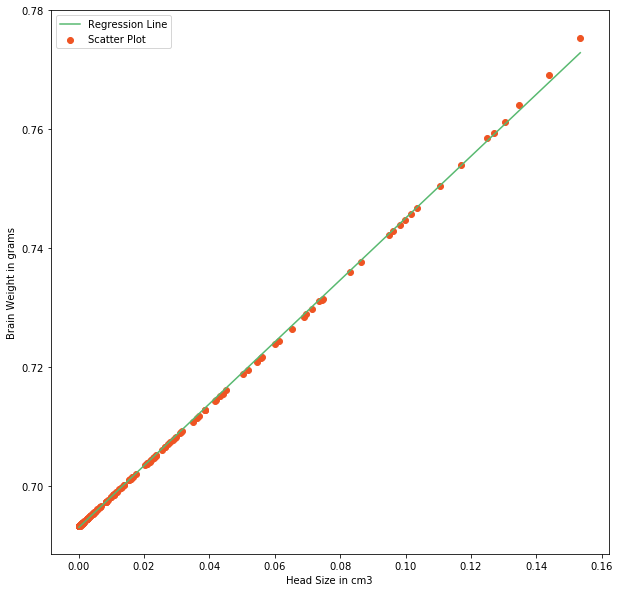

In [186]:
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
plt.figure(figsize=(10,10))
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(df2018[df2018.nodes<0.2].nodes.values, df2018[df2018.nodes<0.2].edges.values, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()

plt.show()

In [194]:
c

0.6929581751572716

In [193]:
import numpy as np
from sklearn.linear_model import LinearRegression

ImportError: cannot import name 'issparse'

In [195]:
m , b = np.polyfit(df2018.nodes.values, df2018.edges.values, 1)

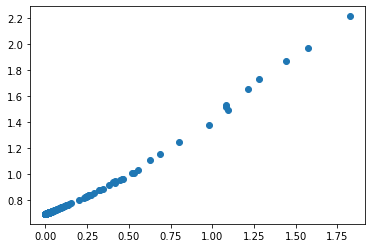

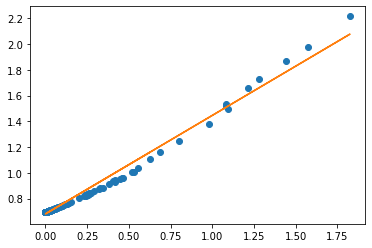

In [198]:
plt.plot(df2018.nodes.values, df2018.edges.values, 'o')
plt.plot(df2018.nodes.values,m*df2018.nodes.values+b)

In [202]:
outliercheck2018 = {}
for key in Ei2018:
    outliercheck2018[key] = (max([math.log(Ei2018[key]),m*(math.log(Ni2018[key]))+b])/min([math.log(Ei2018[key]),m*(math.log(Ni2018[key]))+b])) * math.log(abs((math.log(Ei2018[key])-m*(math.log(Ni2018[key]))+b)/math.log(Ei2018[key]))+1)
    

In [211]:
outliercheck2019 = {}
for key in Ei2019:
    outliercheck2019[key] = (max([math.log(Ei2019[key]),m*(math.log(Ni2019[key]))+b])/min([math.log(Ei2019[key]),m*(math.log(Ni2019[key]))+b])) * math.log(abs((math.log(Ei2019[key])-m*(math.log(Ni2019[key]))+b)/math.log(Ei2019[key]))+1)
    

In [215]:
outliercheck2020 = {}
for key in Ei2020:
    outliercheck2020[key] = (max([math.log(Ei2020[key]),m*(math.log(Ni2020[key]))+b])/min([math.log(Ei2020[key]),m*(math.log(Ni2020[key]))+b])) * math.log(abs((math.log(Ei2020[key])-m*(math.log(Ni2020[key]))+b)/math.log(Ei2020[key]))+1)
    

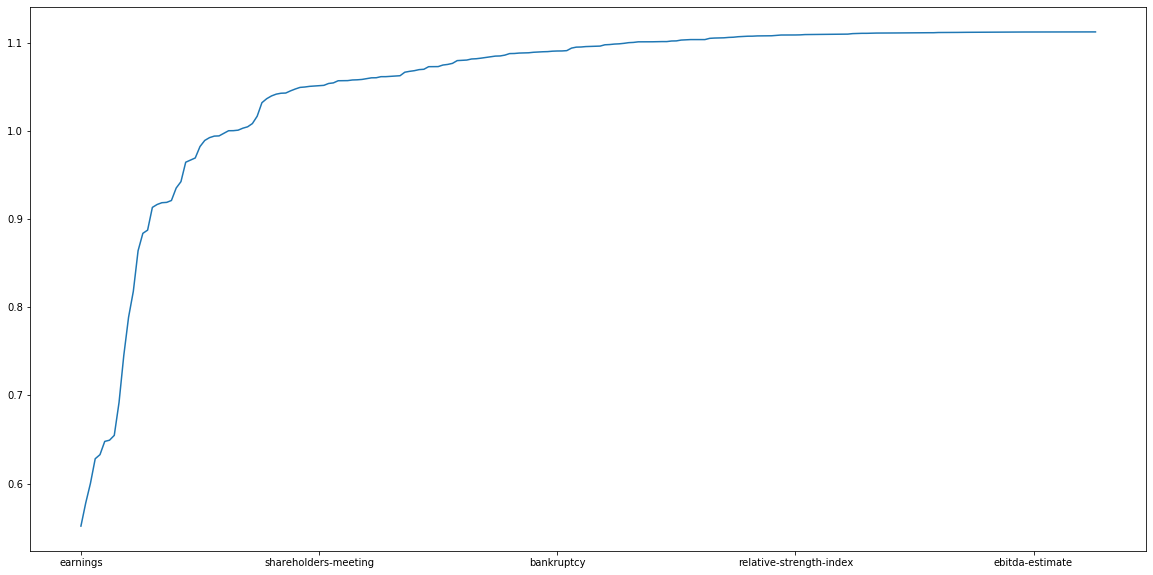

In [219]:
outliercheck2018series = pd.Series(outliercheck2018).sort_values()
outliercheck2018series.plot(figsize=(20,10))

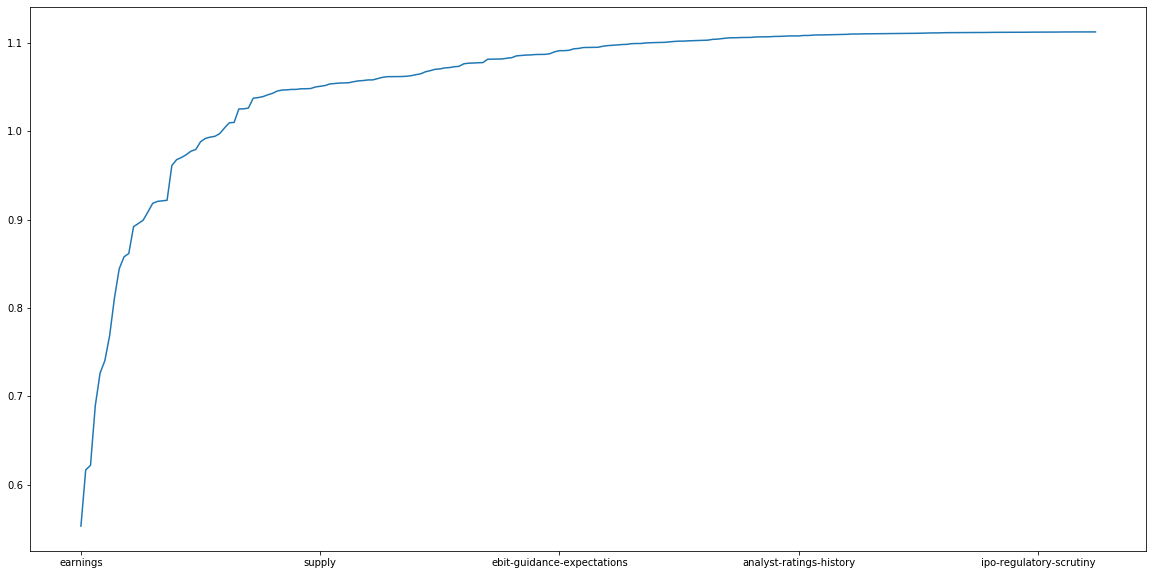

In [220]:
outliercheck2019series = pd.Series(outliercheck2019).sort_values()
outliercheck2019series.plot(figsize=(20,10))

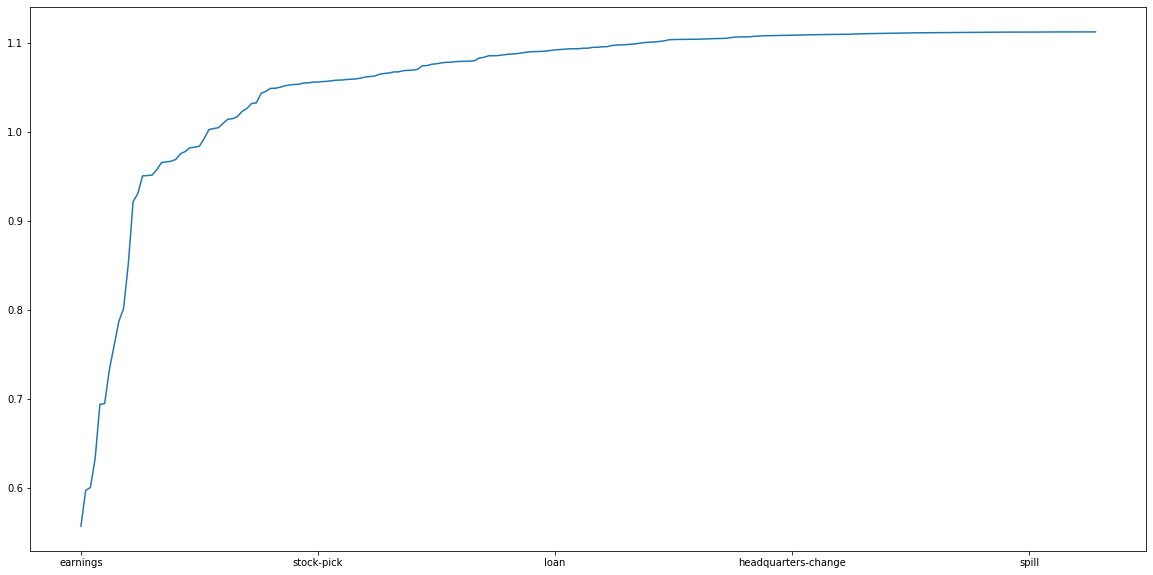

In [221]:
outliercheck2020series = pd.Series(outliercheck2020).sort_values()
outliercheck2020series.plot(figsize=(20,10))

In [267]:
outlierdfall = pd.DataFrame(index=set.intersection(set(pd.Series(outliercheck2018).index),set(pd.Series(outliercheck2019).index),set(pd.Series(outliercheck2020).index))
                            ,columns=['2018','2019','2020'])
# outlierdfall = pd.DataFrame(columns=['2018','2019','2020'])

In [268]:
outlierdfall['2020'] = pd.Series(outliercheck2020)
outlierdfall['2018'] = pd.Series(outliercheck2018)
outlierdfall['2019'] = pd.Series(outliercheck2019)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f06eef30080>,
      dtype=object)

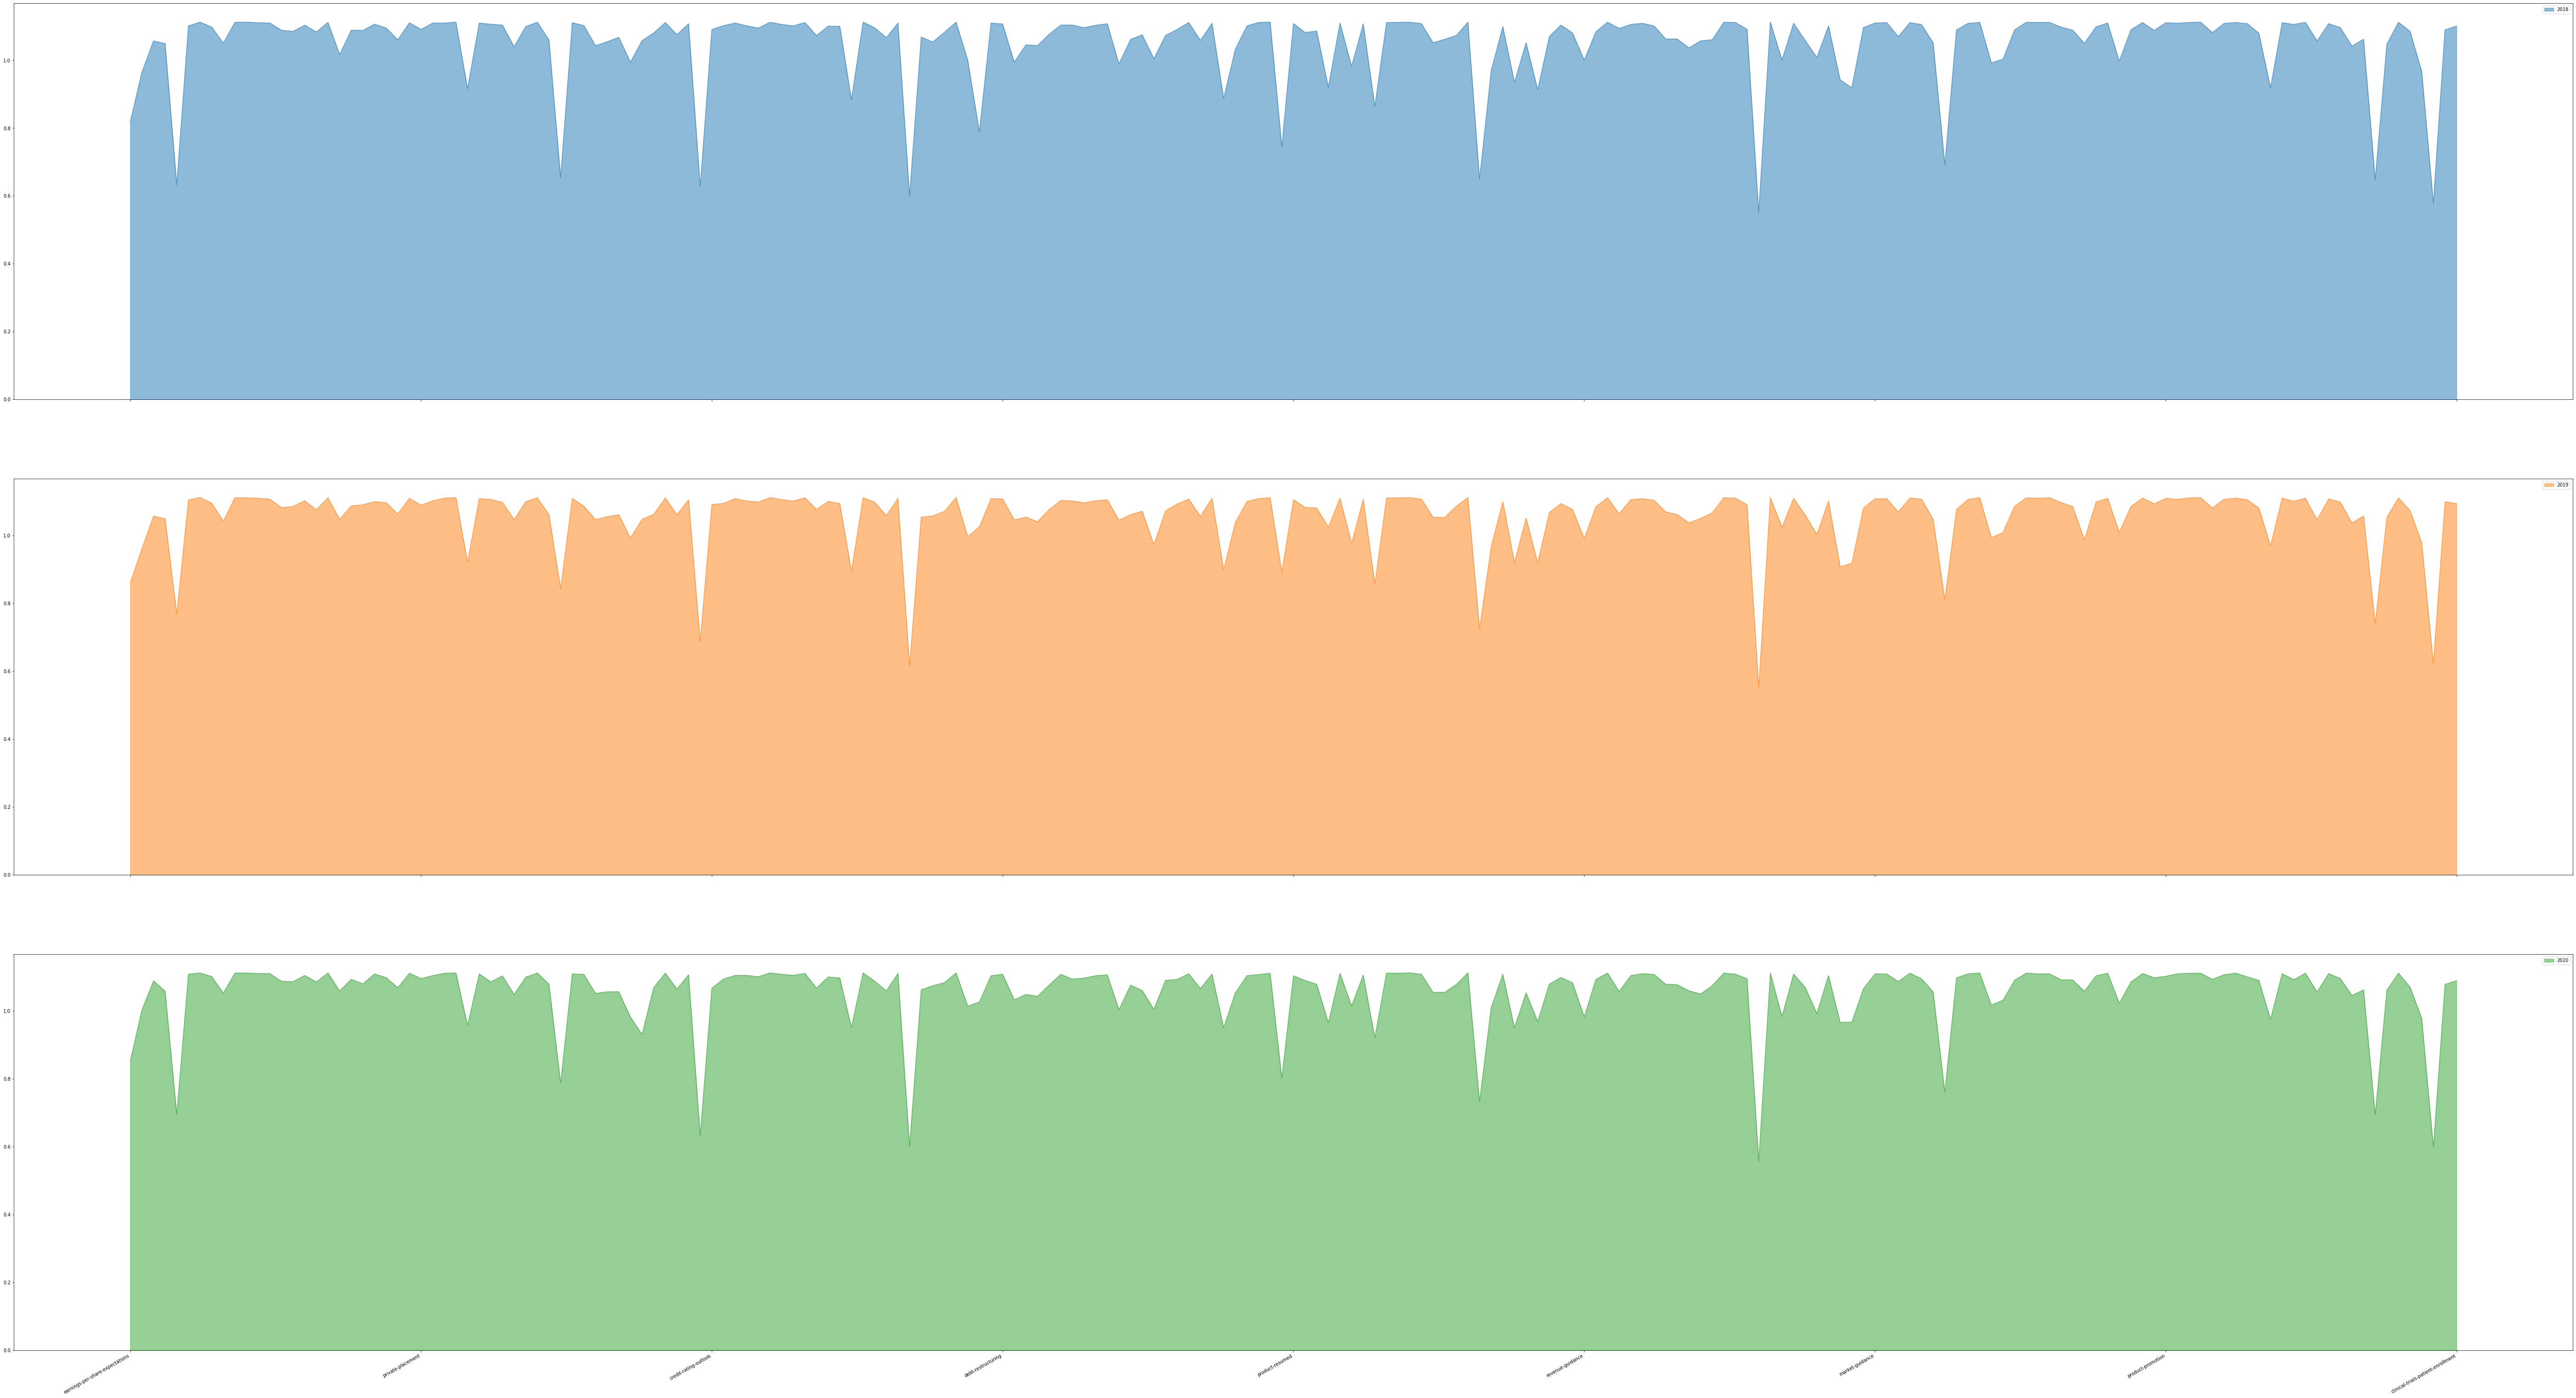

In [269]:
outlierdfall.plot.area(stacked=False,figsize=(100,60),subplots=True)

In [266]:
len(outliercheck2020)

215

In [251]:
set(pd.Series(outliercheck2019).index) - set(pd.Series(outliercheck2018).index) - set(pd.Series(outliercheck2020).index)

{'board-member-health',
 'breakthrough-therapy-application',
 'priority-review-application'}

In [252]:
set(pd.Series(outliercheck2019).index) - set(pd.Series(outliercheck2018).index) - set(pd.Series(outliercheck2020).index)

{'no-imbalance', 'operating-earnings-estimate'}

In [253]:
set(pd.Series(outliercheck2018).index) - set(pd.Series(outliercheck2019).index) - set(pd.Series(outliercheck2020).index)

{'freight-transport-accident',
 'ipo-regulatory-approval',
 'unit-acquisition-bid',
 'vandalism'}

In [272]:
with open('outlierdict2018.pickle', 'wb') as filehandle:
    pickle.dump(outliercheck2018, filehandle)
with open('outlierdict2019.pickle', 'wb') as filehandle:
    pickle.dump(outliercheck2019, filehandle)
with open('outlierdict2020.pickle', 'wb') as filehandle:
    pickle.dump(outliercheck2020, filehandle)

In [ ]:
with open('Ei2018.pickle', 'wb') as filehandle:
    pickle.dump(Ei2018, filehandle)
with open('Ei2019.pickle', 'wb') as filehandle:
    pickle.dump(Ei2019, filehandle)
with open('Ei2020.pickle', 'wb') as filehandle:
    pickle.dump(Ei2020, filehandle)